In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp # scipy expands on numpy with additional functionality for scientific computing

In [3]:
# 1.1 (anharmonic hamiltonian in harmonic eigenbasis)
def anharmonic_oscillator(lam, N_t): # N_t: truncation size, lam: coefficient of anharmonic term x^4 (h_bar, m, omega = 1)
    # use masking instead of loops over i,j with kroncker deltas to build raising/lowering operators
    I, J = np.indices((N_t, N_t)) # np.indices returns a tuple of arrays I, J with shape (N_t, N_t) representing the indices of a grid (I[i,j] = i, J[i,j] = j)
    mask_1 = (I == J + 1)   # boolean array; mask_1[i,j] is True iff i == j+1 (subdiagonal), else False
    mask_2 = (I == J - 1)   # boolean array; mask_2[i,j] is True iff i == j-1 (superdiagonal), else False
    a_dag = np.where(mask_1, np.sqrt(I), 0.0)  # (a_dag)_{i,j} = sqrt(i) if i == j+1, else 0
    a = np.where(mask_2, np.sqrt(J), 0.0)  #  a_{i,j}  = sqrt(j) if i == j-1, else 0
    x = np.sqrt(1/2)* (a_dag + a) # position operator x in terms of a and a_dag
    p = np.sqrt(1/2)*1j* (a_dag - a) # momentum operator p in terms of a and a_dag (j = imaginary unit)
    N = a_dag @ a # number operator N = a_dag @ a (@ = matrix multiplication, * = element-wise multiplication)
    H = N + (1/2) * np.identity(N_t) + lam*(np.linalg.matrix_power(x, 4)) # Hamiltonian H = N + 1/2 + lam*x^4
    return H, x, p

lam = 1
N_t = 10

H = anharmonic_oscillator(lam, N_t)[0]
rounded_H = np.round(H, 3)
print("Anharmonic Hamiltonian (lam=1, N_t=10):\n", rounded_H)

Anharmonic Hamiltonian (lam=1, N_t=10):
 [[ 1.25   0.     2.121  0.     1.225  0.     0.     0.     0.     0.   ]
 [ 0.     5.25   0.     6.124  0.     2.739  0.     0.     0.     0.   ]
 [ 2.121  0.    12.25   0.    12.124  0.     4.743  0.     0.     0.   ]
 [ 0.     6.124  0.    22.25   0.    20.125  0.     7.246  0.     0.   ]
 [ 1.225  0.    12.124  0.    35.25   0.    30.125  0.    10.247  0.   ]
 [ 0.     2.739  0.    20.125  0.    51.25   0.    42.125  0.    13.748]
 [ 0.     0.     4.743  0.    30.125  0.    70.25   0.    56.125  0.   ]
 [ 0.     0.     0.     7.246  0.    42.125  0.    92.25   0.    50.912]
 [ 0.     0.     0.     0.    10.247  0.    56.125  0.    94.75   0.   ]
 [ 0.     0.     0.     0.     0.    13.748  0.    50.912  0.    47.75 ]]


'At lambda = 0, the eigenvalues remain constant for all N_t because they are the exact eigenvalues of the quantum harmonic oscillator. However, as lambda increases, the eigenvalues are no longer constant with respect to N_t. They oscillate and converge more slowly, indicating that a larger truncation size is needed to accurately capture the effects of the anharmonic term in the Hamiltonian. The value that the eigenvalues converge to also increases with larger lambda, reflecting the increased energy levels due to the anharmonicity. The higher energy levels (higher k) tend to converge more slowly than the lower ones, especially at larger lambda values because they are more affected by the anharmonic term.'

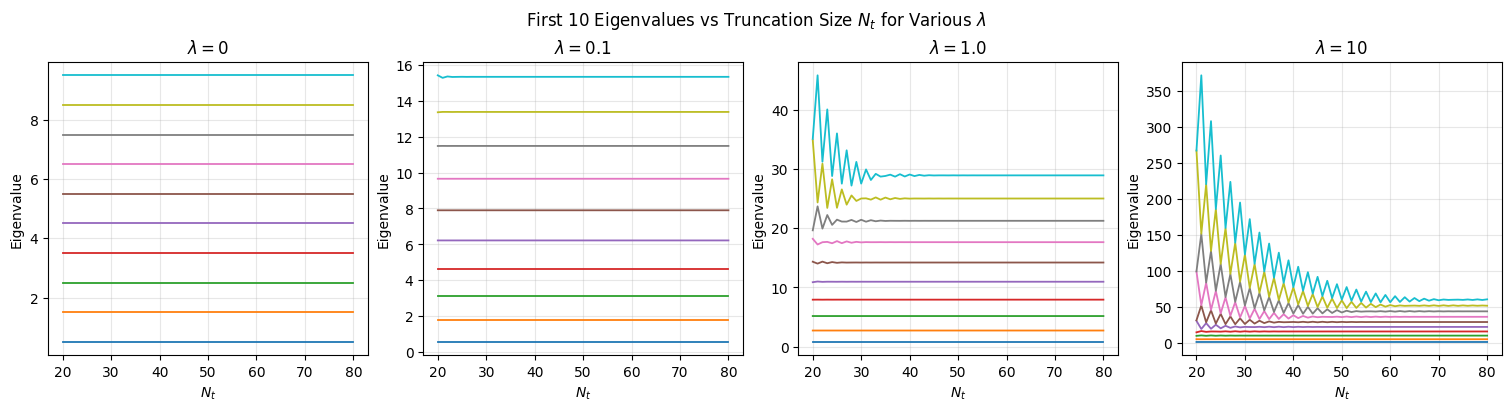

In [4]:
# 1.2 (eigenvalues of anharmonic hamiltonian)
def get_k_eig(lam, N_t, k): # return first k eigenvalues and corresponding eigenvectors of anharmonic hamiltonian for given lam and N_t
    H = anharmonic_oscillator(lam, N_t)[0]
    eigvals, eigvecs = sp.linalg.eigh(H)  # eigvals = array of eigenvalues, eigvecs = column matrix with corresponding normalized eigenvectors
    return eigvals[:k], eigvecs[:,:k] # return first k eigenvalues and corresponding eigenvectors

lams = [0, 0.1, 1.0, 10]
N_ts = np.arange(20,81)
k = 10
fig, axs = plt.subplots(1, len(lams), figsize=(15,4), constrained_layout=True) # fig = whole figure (15x4 inches), axs = 1 x len(lam_list) array of empty subplots 
fig.suptitle(f"First {k} Eigenvalues vs Truncation Size $N_t$ for Various $\lambda$") # overall title for figure
for idx, lam in enumerate(lams): # enumerate(lam_list) gives (index, value) pairs (i.e. 0, 0), (1, 0.1), (2, 1.0), ...
    eig_arr = np.zeros(shape = (k, len(N_ts))) # array to hold first k eigenvalues for each N_t
    for col, N_t in enumerate(N_ts): # enumerate(N_ts) gives (index, value) pairs (i.e. 0, 20), (1, 21), ...)
        eigvals, eigvecs = get_k_eig(lam, N_t, k)
        eig_arr[:, col] = eigvals # store eigenvalues in column corresponding to N_t
    axs[idx].plot(N_ts, eig_arr.T, lw=1.3) #  plot each eigenvalue (rows of eig_arr) vs N_t for idx'th subplot by calling .plot method on axs[idx]
    # call methods on axs[idx] to set title and labels for each subplot (note set_ keyword)
    axs[idx].set_title(rf"$\lambda={lam}$") # latex formatting with raw string (rf"")
    axs[idx].set_xlabel(r"$N_t$")
    axs[idx].set_ylabel("Eigenvalue")
    axs[idx].grid(alpha=0.3) # alpha sets transparency of grid lines

'At lambda = 0, the eigenvalues remain constant for all N_t because they are the exact eigenvalues of the quantum harmonic oscillator. However, as lambda increases, the eigenvalues are no longer constant with respect to N_t. They oscillate and converge more slowly, indicating that a larger truncation size is needed to accurately capture the effects of the anharmonic term in the Hamiltonian. The value that the eigenvalues converge to also increases with larger lambda, reflecting the increased energy levels due to the anharmonicity. The higher energy levels (higher k) tend to converge more slowly than the lower ones, especially at larger lambda values because they are more affected by the anharmonic term.'


Fitted line: ln(E_0) ~ 0.282983 * ln(lambda) + -0.218830
Thus, for large lambda, the ground state energy scales as E_0 ~ (lambda^0.282983) (power law relationship).


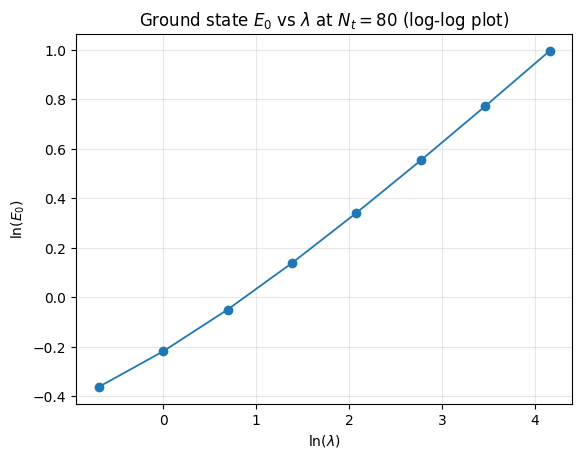

In [5]:
# 1.3 (ground state energy vs lambda)
lams = np.array([0.5*2**n for n in range(8)]) # lambda values: 0.5, 1, 2, 4, 8, 16, 32, 64
N_t = 80
k = 1

E_0s = [get_k_eig(lam, N_t, k)[0][0] for lam in lams] # list of ground state energies for each lambda
log_lams = np.log(lams)
log_E_0s = np.log(E_0s)
plt.plot(log_lams, log_E_0s, '-o', lw=1.3) # plot ln(E_0) vs ln(lambda), roughly linear for large lambda
plt.xlabel(r"$ \ln(\lambda$)")
plt.ylabel(r"$\ln(E_0$)")
plt.title(r"Ground state $E_0$ vs $\lambda$ at $N_t=80$ (log-log plot)")
plt.grid(alpha=0.3)

c_1 = np.polyfit(log_lams, log_E_0s, 1) # fit polynomial of degree 1 (line) to ln(E_0s) = c_1[0]*ln(lams) + c_1[1] 
print(f"Fitted line: ln(E_0) ~ {c_1[0]:.6f} * ln(lambda) + {c_1[1]:.6f}")
print(f"Thus, for large lambda, the ground state energy scales as E_0 ~ (lambda^{c_1[0]:.6f}) (power law relationship).")

/opt/anaconda3/envs/sci-dev/lib/python3.11/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/envs/sci-dev/lib/python3.11/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


'The product of the uncertainties Δx and Δp remains well above the Heisenberg limit of 1/2 for all values of λ, confirming the validity of the uncertainty principle in this anharmonic oscillator system.'

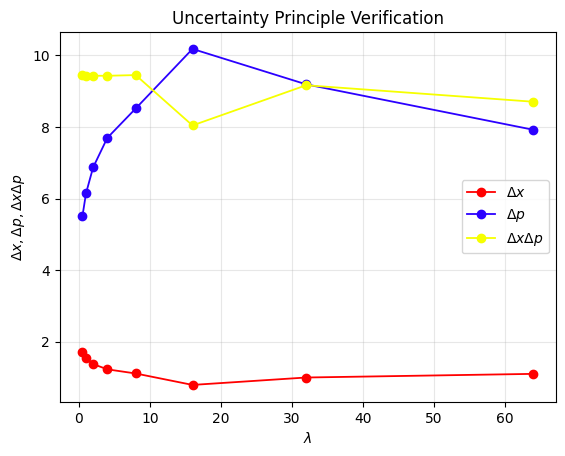

In [6]:
#1.4 (verify uncertainty principle)
k = 10
N_t = 80
std_xs = []
std_ps = [] 
for lam in lams:
    eigvalues, eigvectors = get_k_eig(lam, N_t, k)
    k_eigvalue, k_eigvector = eigvalues[-1], eigvectors[:,-1] # get k'th eigenvalue and corresponding eigenvector
    x, p = anharmonic_oscillator(lam, N_t)[1:]
    exp_xsq = (k_eigvector.conj().T) @ (x@x) @ k_eigvector # expectation value of x^2 = <psi|x^2|psi> (similarly for p^2)
    exp_psq = (k_eigvector.conj().T) @ (p@p) @ k_eigvector
    std_x = np.sqrt(exp_xsq) # standard deviation delta_x = sqrt(<x^2> - <x>^2), but <x> = 0 by symmetry (similarly for p)
    std_p = np.sqrt(exp_psq) 
    std_xs.append(std_x)
    std_ps.append(std_p)

std_xs_arr = np.array(std_xs)
std_ps_arr = np.array(std_ps)
product_arr = std_xs_arr * std_ps_arr

plt.plot(lams, std_xs_arr, '-o', color="#FF0000", lw=1.3) 
plt.plot(lams, std_ps_arr, '-o', color="#2B00FF", lw=1.3) 
plt.plot(lams, product_arr, '-o', color="#F6FF00", lw=1.3) 
plt.xlabel(r"$ \lambda$")
plt.ylabel(r"$ \Delta x, \Delta p, \Delta x \Delta p$")
plt.legend([r"$\Delta x$", r"$\Delta p$", r"$\Delta x \Delta p$"])
plt.title(r"Uncertainty Principle Verification")
plt.grid(alpha=0.3)

'The product of the uncertainties Δx and Δp remains well above the Heisenberg limit of 1/2 for all values of λ, confirming the validity of the uncertainty principle in this anharmonic oscillator system.'


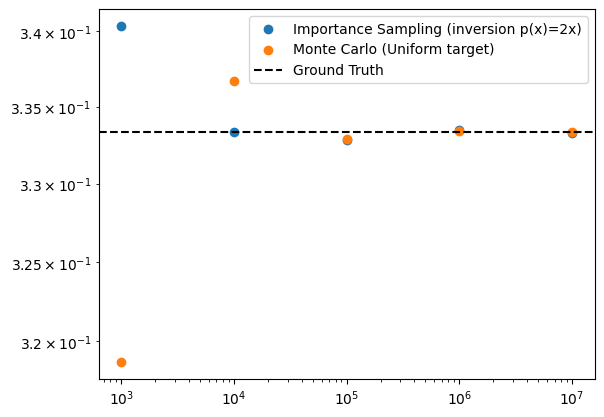

In [177]:
# 3.1 (Uniform Monte Carlo vs. Importance Sampling with inversion)

# --- Uniform Monte Carlo (baseline) ---
# Goal: estimate I = ∫_0^1 f(x) dx when the target density is uniform t(x) = 1 on [0,1].
# Draw X ~ Unif(0,1). By the Law of Large Numbers, the sample mean → expected value as N → ∞:
#     I = ∫_0^1 f(x) t(x) dx = E_t[f(X)]  ≈  (1/N) ∑_{i=1}^N f(X_i),   X_i ~ Unif(0,1).
# This estimator is simple and unbiased. Its variance is:
#     Var(Ī_MC) = (1/N) Var_t(f(X)) = (1/N) [ E_t(f(X)^2) - (E_t[f(X)])^2 ] = (1/N) [E_t(f(X)^2) - I^2] = (1/N) [ ∫_0^1 f(x)^2 dx − I^2] (high variance if f varies a lot over [0,1].)

# --- Importance Sampling (variance reduction) ---
# Idea: sample from a proposal pdf p(x) on [0,1] that places more mass where |f(x)| is large, then reweight to keep the same target integral.
# Let w(x) = t(x)/p(x). Since t(x)=1 on [0,1]:
#     I = ∫ f(x) t(x) dx = ∫ f(x) w(x) p(x) dx = E_{X~p}[ f(X) w(X) ].
# Monte Carlo estimator:
#     Ī_IS = (1/N) ∑ f(X_i) w(X_i),   X_i ~ p.
# Variance (assuming normalized t and p):
#     Var(Ī_IS) = (1/N) [ E_p( (f(X) w(X))^2 ) - I^2 ] = (1/N) [ ∫ f(x)^2 t(x)^2 / p(x) dx - I^2 ] (if p ~ |f| (or |f|·t), typically lower variance than uniform MC)

# --- Inversion Sampling (to draw from nonuniform distribution p(x) on [0,1]) ---
# If U ~ Unif(0,1) and F_p is a CDF with inverse F_p^{-1}, then X = F_p^{-1}(U) has PDF p(x) = dF_p/dx.
# Conversely, given p(x), compute its CDF F_p(x) = ∫_0^x p(t) dt, then invert to get F_p^{-1} (this may be analytical or numerical).

rng = np.random.default_rng(0)  # create a random number generator (seed = 0, so results are same each run)
f = lambda x: x**2  # integrand

def monte_carlo_uniform(f, N, rng):
    # uniform MC: X_i ~ Unif(0,1), estimate I ≈ mean(f(X_i))
    x = rng.random(size=N) # N samples x_i ~ Unif(0,1)
    return np.mean(f(x)) # (1/N) ∑_{i=1}^N f(x_i) = unbiased estimate of ∫_0^1 f(x) dx

def importance_sampling_inversion(f, N, rng):
    # p(x)∝ x → p(x) = 2x on [0,1] with CDF F_p(x) = ∫_0^x f(t) dt = x^2 ⇒ X = √U
    # For this p, w(x) = 1/p(x) = 1/(2x), so each IS term is f(X) / (2X)
    u = rng.random(size=N) # u_i ~ Unif(0,1)
    x = np.sqrt(u) # x_i = √u_i 
    weights = f(x) / (2.0 * x) # f(x_i) * t(x_i)/p(x_i)
    return np.mean(weights) # (1/N) ∑ f(x_i) w(x_i) = unbiased IS estimate of ∫_0^1 f(x) dx

imp, mc = [], []
ns = [10**k for k in range(3, 8)] # N = 1e3, 1e4, ..., 1e7
for n in ns:
    imp.append(importance_sampling_inversion(f, n, rng))
    mc.append(monte_carlo_uniform(f, n, rng))

ground_truth = 1/3 # ∫_0^1 x^2 dx = 1/3

# Plot: estimates vs N (log-log); both should approach the ground truth line.
plt.scatter(ns, imp, label='Importance Sampling (inversion p(x)=2x)')
plt.scatter(ns, mc, label='Monte Carlo (Uniform target)')
plt.axhline(ground_truth, color='k', linestyle='--', label='Ground Truth')
plt.legend()
plt.yscale('log') # visualize convergence across magnitudes
plt.xscale('log')

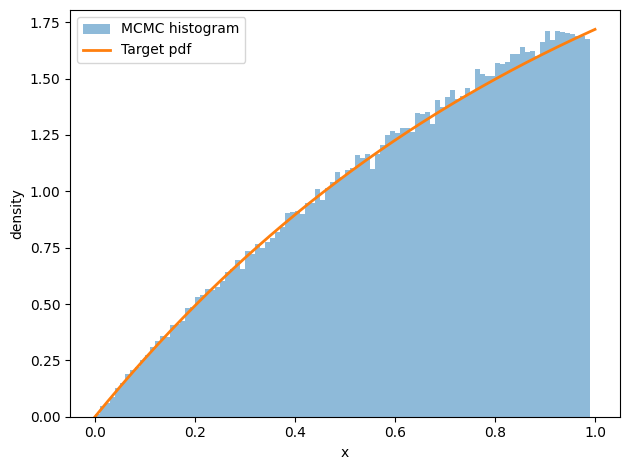

In [190]:
# 3.2.1 (generate nonuniform distribution with Metropolis/Hastings algorithm)

#  --- Metropolis/Hastings Algorithm ---
#  Goal: Generate a Markov chain {x_0, x_1, …, x_T} whose marginal distribution converges to the target distribution p(x) on [a, b]
#  (use an unnormalized density \tilde{p}(x) ∝ p(x) because algorithm only uses ratios)

# Initialization:
# 1) Choose an initial distribution μ₀ on [a,b] and draw x₀ ~ μ₀ (ensure \tilde{p}(x₀) > 0)
# 2) Choose a proposal kernel q(·|x): a normalized probability distribution on any subset of ℝ, given the current state x (e.g., Uniform(x-δ, x+δ))
#    q(y|x) = transition probability density of proposing y given current state x
# 3) Set the number of time steps T (and optionally a burn-in and thinning)
#
# Loop (for t = 0,1,2,…,T-1):
# 1) Draw y ~ q(·|x_t) (propose new state y given current state x_t)
# 2) Compute the acceptance ratio
#       α(x_t, y) = min{ 1,[ \tilde{p}(y) / \tilde{p}(x_t) ] * [ q(x_t|y) / q(y|x_t) ] }.
#    For *symmetric* proposals (e.g., Uniform(x±δ), Normal(x, s²)), the Hastings factor q(x_t|y)/q(y|x_t) = 1
#
# 3) Accept/Reject:
#    - If α = 1 (i.e., weight ≥ 1): set x_{t+1} = y. (always accept)
#    - Else if 0 < α < 1 (i.e., 0 < weight < 1): draw r ~ Uniform(0,1)
#         If r ≤ α (i.e., r ≤ weight): set x_{t+1} = y (accept); else x_{t+1} = x_t (reject)
#    - If α = 0 (e.g., y outside support so \tilde{π}(y)=0): set x_{t+1} = x_t
#
# Convergence (intuition):
#   For large T (after optional discarding first several samples (burning) and keeping every k-th sample (thinning)), the remaining states {x_t} are approximately distributed according to π
#   (though the {x_t} are correlated, not i.i.d.)
#
# Tips for choosing q(·|x):
# - Support/Reachability: proposals should allow reaching any region where π>0
# - Symmetric, simple samplers (Uniform window or Gaussian RW) keep code easy because the q-ratio cancels
# - Tune step size (δ or s) to target ~40–60% acceptance in 1D
#      - Too small δ: very high acceptance, but tiny moves → strong autocorrelation → inefficient (slow mixing); also may not explore full support for finite T
#      - Too large δ: very low acceptance → many rejections → poor exploration (also inefficient)
# - Boundaries: proposing on ℝ and auto-rejecting out-of-bounds is simplest; or truncate/renormalize q near edges (then include q-ratio)

delta = 0.1
xmin = 0.
xmax = 1.
rng = np.random.default_rng(0) 

def P(a, x): # unnormalized target distribution \tilde{p}(x) ∝ p(x)
    if(x < xmin or x > xmax):
        return 0.
    return 1.0 - np.exp(-a*x)

def proposal_kernel(x, delta, rng):
    # define proposal kernel q(·|x) = Uniform(x-δ, x+δ) = x + Uniform(-δ, δ) = x + (2*Uniform(0,1)-1)*δ (affine transform: if U ~ U(0,1), Y = a + (b-a)* U ~ Uniform(a,b))
    # choose delta so that for typical states x, most proposals stay within [xmin, xmax] while still being large enough to move the chain efficiently
    u = rng.random() # generate uniform random number in [0,1)
    return x+(2*u-1)*delta 

def metropolis_step(P, a, xold, delta, rng):
    # one Metropolis update: propose → compute weight → accept/reject
    y = proposal_kernel(xold, delta, rng) # draw y ~ q(·|xold)
    weight = P(a, y)/P(a, xold) # symmetric q ⇒ Hastings factor cancels
    xnew = xold # set xnew = xold by default (reject)
    if(weight >= 1): # accept always when α=1
        xnew = y
    elif(weight != 0):
        r = rng.random() # draw r ~ Uniform(0,1)
        if(r <= weight): # accept with prob. α=weight
            xnew = y
    return xnew

def metropolis(P, a, xtrial, delta, rng, T):
    # run T steps, returning the full path [x0, x1, ..., xT]
    xs = [xtrial]
    for t in range(T):
        xtrial = metropolis_step(P, a, xtrial, delta, rng)
        xs.append(xtrial)
    return xs

T = 300000 # large number of total steps
burn = 5000 # remove first 5000 samples to allow chain to converge
thin = 1 # no thinning

def target_distribution(P, a, delta, rng, T, burn, thin):
    # build chain from midpoint, then drop burn-in and apply thinning
    xmid = (xmin+xmax)/2
    xs = metropolis(P, a, xmid, delta, rng, T)
    return np.array(xs[burn:: thin])

def Z(a): # normalizing constant on [0,1]
    return 1.0 - (1.0 - np.exp(-a))/a

a = 1 # choose arbitrary a for demonstration
dx = 0.01
xs = target_distribution(P, a, delta, rng, T, burn, thin)
# plot a density histogram: bins span [xmin, xmax] in steps of 0.01; bar height = (count in bin) / (total samples × bin width)
plt.hist(xs,bins=np.arange(xmin, xmax, dx), density=True, alpha=0.5, edgecolor='none', label='MCMC histogram') # histogram is plot of samples 
x = np.linspace(0, 1, 400)
pdf = (1.0 - np.exp(-a * x)) / Z(a) # = P(a, [0,1])
plt.plot(x, pdf, lw=2, label='Target pdf') # plot target pdf, the histogram should approximate this (height of ith bar ≈ pdf at midpoint of ith bin)
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.show()

In [196]:
# 3.2.2 (uniform Monte Carlo vs importance sampling)
g = lambda x: np.sqrt(x) # estimate integral I = ∫_0^1 g(x) dx = 2/3 with two methods

def importance_sampling_metropolis(xs, a, g): # importance sampling using samples xs from target distribution P(a,x)
    Pxs = 1.0 - np.exp(-a*xs)
    IS_summand = g(xs)/Pxs
    return Z(a)*np.mean(IS_summand)         

print(f'The importance sampling estimate of I is {importance_sampling_metropolis(xs, a, g)}')
print(f'The uniform Monte Carlo estimate of I is {monte_carlo_uniform(g, len(xs), rng)}') # using same number of samples as importance sampling

The importance sampling estimate of I is 0.6665117761962335
The uniform Monte Carlo estimate of I is 0.6675581908855548


In [220]:
# 3.2.3 (find a that minimizes variance of importance sampling estimator numerically)
a_values = np.logspace(-2, 2, 200)  # generate 200 a values from 0.01 to 100
x_samp = np.linspace(0, 1, num=2001) # sample space discretized for numerical integration
x_mids = (1/2)*(x_samp[1:] + x_samp[:-1]) # midpoints for Riemann sum
dx = x_samp[1] - x_samp[0]
eps = 1e-300
I = 2/3 

variances = []
for a in a_values:
    # numeric guarding (avoid division by 0) 
    Px_samp = np.maximum((1.0 - np.exp(-a*x_mids))/Z(a), eps) 
    var_integrand = g(x_mids)**2/Px_samp
    expfsq = np.sum(var_integrand)*dx # ∫_0^1 (g(x)^2 / p(x)) dx ≈ ∑ var_integrand * dx 
    var = (expfsq- I**2)/len(xs) # Var(Ī_IS) = (1/N) [ E_p( (f(X) w(X))^2 ) - I^2 ] (N = len(xs) = number of samples)
    variances.append(var)

print(f'The value of a that minimizes the variance is approximately {round(a_values[np.argmin(variances)], 4)}') # find index of minimum variance and corresponding a value

The value of a that minimizes the variance is approximately 3.7399


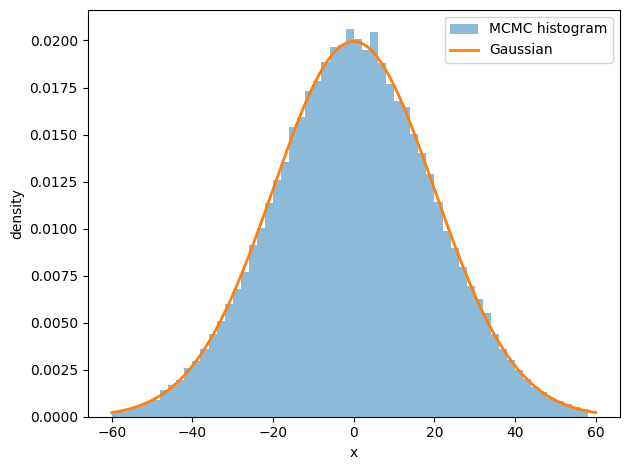

In [213]:
# 2.1 (Metropolis/Hastings for Gaussian distribution)
def gaussian(mu, sigma, x): 
    A = 1/np.sqrt(2*np.pi*sigma**2)
    return A * np.exp(-(x-mu)**2/(2*sigma**2))

# use same function structure as in 3.2.1 but replace P with gaussian, and add accept_counter to track acceptance rate of proposals
def metropolis_step_gaussian(gaussian, mu, sigma, xold, delta, rng, accept_counter):
    y = proposal_kernel(xold, delta, rng) 
    weight = gaussian(mu, sigma, y)/gaussian(mu, sigma, xold) 
    xnew = xold 
    if(weight >= 1):
        xnew = y
        accept_counter += 1
    elif(weight != 0):
        r = rng.random() 
        if(r <= weight):
            xnew = y
            accept_counter += 1
    return xnew, accept_counter

def metropolis_gaussian(gaussian, mu, sigma, xtrial, delta, rng, T):
    xs = [xtrial]
    accept_counter = 0
    for t in range(T):
        xtrial, accept_counter = metropolis_step_gaussian(gaussian, mu, sigma, xtrial, delta, rng, accept_counter)
        xs.append(xtrial)
    return xs, accept_counter/T # return acceptance ratio = accepted proposals / total proposals

def target_distribution_gaussian(gaussian, mu, sigma, delta, rng, T, burn, thin):
    xmid = mu
    xs, accept_ratio = metropolis_gaussian(gaussian, mu, sigma, xmid, delta, rng, T)
    return np.array(xs[burn:: thin]), accept_ratio

# parameters (rng, T, burn, thin defined in 3.2.1)
mu = 0
delta = 64 # tune delta to get reasonable acceptance rate (~40-60%)
sigma = 20.
xmin = -60
xmax = 60
dx = sigma/10 

bins = np.arange(xmin, xmax, dx) 
xs_approx, accept_ratio = target_distribution_gaussian(gaussian, mu, sigma, delta, rng, T, burn, thin)
plt.hist(xs_approx, bins, density=True, alpha=0.5, edgecolor='none', label='MCMC histogram') 
x = np.linspace(xmin, xmax, 400)
pdf = gaussian(mu, sigma, x)
plt.plot(x, pdf, lw=2, label='Gaussian') 
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.show()

The fitted quadratic function is KL(z) = 7.857995e-01 * z^2 + -1.892391e+01 * z + 1.780116e+02
The fitted logistic function is accept_ratio(z) = 9.985679e-01 / (1 + exp((9.081183e-01) * (z - 5.859676e+00)))
The delta that gives a 44% acceptance ratio is approximately 6.966772e+01


'The KL divergence decreases as delta increases from very small values, reaching a minimum at an optimal delta, and then increases again for larger deltas. This behavior indicates that there is a trade-off in choosing delta: too small a delta leads to high autocorrelation and poor exploration of the target distribution (in finite steps), while too large a delta results in low acceptance rates and poor exploration of the target distribution. The acceptance ratio follows a logistic curve, starting near 1 for small deltas (high acceptance) and decreasing towards 0 for large deltas (low acceptance). The ideal acceptance ratio of around 44% corresponds to a delta that balances exploration and acceptance effectively.'

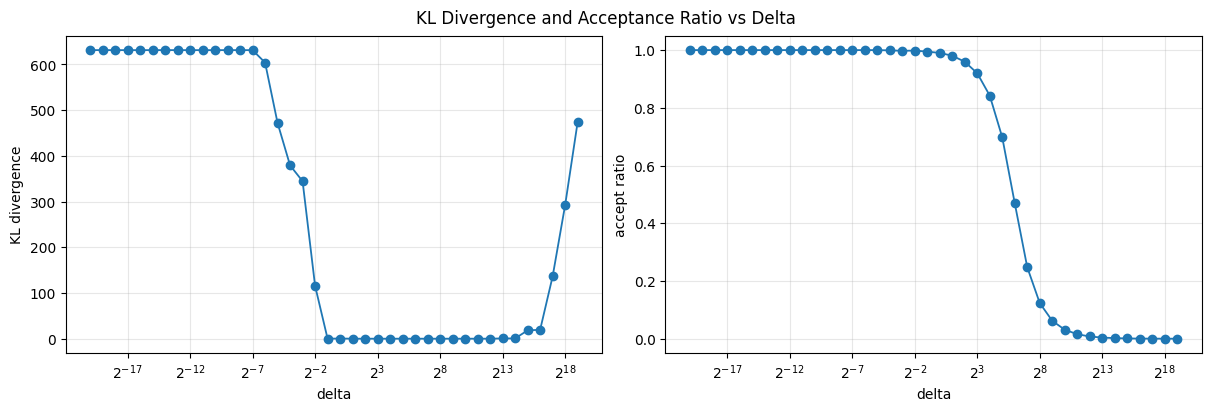

In [226]:
# 2.2 (Kullback-Leibler divergence of Metropolis samples vs delta, acceptance ratio vs delta)
deltas = [2**k for k in range(-20,20)]
KL_divs = []
accept_ratios = []
eps = 1e-300
i = 0
# compute KL divergences and acceptance ratios for each delta
for delta in deltas:
    rng = np.random.default_rng(i) # use different seed for each delta to get different sample paths
    xs_approx, accept_ratio  = target_distribution_gaussian(gaussian, mu, sigma, delta, rng, T, burn, thin)
    # len(edges) = len(bins) + 1, edges[i] is left edge of bin i, edges[-1] is right edge of last bin, len(q_density) = len(bins), q_density[i] = height of bin i (≈ pdf at midpoint of bin i)
    q_density, edges = np.histogram(xs_approx, bins=bins, density=True)
    x_mids = (1/2)*(edges[1:] + edges[:-1]) # midpoints of bins for Riemann sum

    # numeric guarding (avoid division by 0 and log(0)) and renormalization (approximate integral by Riemann sum) on finite window [xmin, xmax]
    p = gaussian(mu, sigma, x_mids)
    p = np.maximum(p, eps)  
    p = p/(np.sum(p)*dx)  

    q = np.maximum(q_density, eps)
    q = q/(np.sum(q)*dx)      

    KL = np.sum(p*(np.log(p) - np.log(q)))*dx # KL divergence D_KL(P||Q) = ∫ p(x) log(p(x)/q(x)) dx ≈ ∑ p(x_i) (log(p(x_i)) - log(q(x_i))) Δx
    KL_divs.append(KL)
    
    accept_ratios.append(accept_ratio)
    i += 1

# plot KL divergence and acceptance ratio vs delta   
fig, axs = plt.subplots(1, 2, figsize=(12,4), constrained_layout=True)
fig.suptitle("KL Divergence and Acceptance Ratio vs Delta")

axs[0].plot(deltas, KL_divs, '-o', lw=1.3)
axs[0].set_xlabel('delta')
axs[0].set_ylabel('KL divergence')
axs[0].set_xscale('log', base=2)
axs[0].grid(alpha=0.3)

axs[1].plot(deltas, accept_ratios, '-o', lw=1.3)
axs[1].set_xlabel('delta')
axs[1].set_ylabel('accept ratio')
axs[1].set_xscale('log', base=2)
axs[1].grid(alpha=0.3)

z = np.log2(deltas)
# fit quadratic function to KL divergence vs z using curve_fit
def quadratic_function(z, a, b, c):
    return a*z**2 + b*z + c
# popt_KL = optimal parameters [a, b, c], pcov_KL = covariance of parameters
popt_KL, pcov_KL = sp.optimize.curve_fit(quadratic_function, z, KL_divs)
print(f'The fitted quadratic function is KL(z) = {popt_KL[0]:.6e} * z^2 + {popt_KL[1]:.6e} * z + {popt_KL[2]:.6e}')

# fit logistic function to acceptance ratio vs z 
def logistic_function(z, L, k, z0):
    return L/(1 + np.exp(-k*(z - z0)))

popt_ar, pcov_ar = sp.optimize.curve_fit(logistic_function, z, accept_ratios)
print(f'The fitted logistic function is accept_ratio(z) = {popt_ar[0]:.6e} / (1 + exp(({-popt_ar[1]:.6e}) * (z - {popt_ar[2]:.6e})))')

id = 0.44 # ideal acceptance ratio for Gaussian target
# find z such that accept_ratio(z) = id -> id = L / (1 + exp(-k*(z - z0))) ⇒ z = z0 + (1/k) * log(id/(L - id))
z_ideal = popt_ar[2] + (1/popt_ar[1]) * np.log(id/(popt_ar[0] - id))
print(f'The delta that gives a 44% acceptance ratio is approximately {2**(z_ideal):.6e}')

'The KL divergence decreases as delta increases from very small values, reaching a minimum at an optimal delta, and then increases again for larger deltas. This behavior indicates that there is a trade-off in choosing delta: too small a delta leads to high autocorrelation and poor exploration of the target distribution (in finite steps), while too large a delta results in low acceptance rates and poor exploration of the target distribution. The acceptance ratio follows a logistic curve, starting near 1 for small deltas (high acceptance) and decreasing towards 0 for large deltas (low acceptance). The ideal acceptance ratio of around 44% corresponds to a delta that balances exploration and acceptance effectively.'

In [183]:
# 4.1 (finite difference method for 2d Schrödinger equation)
def coordinate_grid(lx, ly, lt, nx, ny, nt):
    xs = np.linspace(-lx, lx, nx) # nx x points, includes -lx and lx
    ys = np.linspace(-ly, ly, ny) # ny y points, includes -ly and ly
    ts = np.linspace(0.0, lt, nt) # nt t points, includes 0 and lt

    return xs, ys, ts

def solve_2D_schrödinger_eq(xs, ys, ts, x0, y0, sigx, sigy, kx, ky, V): # solve 2D Schrödinger equation with finite difference method (V = V(x,y) = potential)
    ny, nx, nt = len(ys), len(xs), len(ts)
    dy, dx, dt = ys[1] - ys[0], xs[1] - xs[0], ts[1] - ts[0]
    r_x, r_y = dt/dx**2, dt/dy**2  # finite difference coefficients

    # np.meshgrid takes 1D coordinate arrays (xs, ys) and returns 2D grids (X, Y)
    # with indexing='xy' (Cartesian plotting convention):
    #   - shapes: X.shape == Y.shape == (ny, nx)
    #   - rows correspond to y (moving downwards), columns to x (moving rightwards)
    #   - X[j, i] = xs[i] (each row repeats xs)
    #   - Y[j, i] = ys[j] (each column repeats ys)
    #
    # with indexing='ij' (matrix/index convention):
    #   - shapes: X.shape == Y.shape == (nx, ny)
    #   - rows correspond to x (moving downwards), columns to y (moving rightwards)
    #   - X[i, j] = xs[i] (each column repeats xs)
    #   - Y[i, j] = ys[j] (each row repeats ys)
    X, Y = np.meshgrid(xs,ys, indexing='xy') 

    # psi = psi(x,y,t), so, for any time slice t, y-axis corresponds to rows (y increases downwards), x-axis corresponds to columns (x increases rightwards)
    # psi_r[j,i,k] = psi_r(x_i, y_j, t_k) and psi_i[j,i,k] = psi_i(x_i, y_j, t_k) with j,i,k = 0,...,ny-1,nx-1,nt-1 as indices for y,x,t respectively
    psi_r = np.zeros(shape=(ny, nx, nt))
    psi_i = np.zeros(shape=(ny, nx, nt))

    # initial condition: Gaussian wave packet centered at (x0, y0) with widths (sigx, sigy) and wavevector (kx, ky)
    A = 1.0 / np.sqrt(2.0*np.pi*sigx*sigy) # normalization constant for 2D Gaussian
    # psi(j,i,0) = psi(x_i,y_j,0), and X[j,i] = xs[i], Y[j,i] = ys[j] so indices and coordinates match up
    psi_r[:,:,0] = A * np.exp(-((X-x0)**2/(4*sigx**2) + (Y-y0)**2/(4*sigy**2)))*np.cos(kx*(X-x0) + ky*(Y-y0)) 
    psi_i[:,:,0] = A * np.exp(-((X-x0)**2/(4*sigx**2) + (Y-y0)**2/(4*sigy**2)))*np.sin(kx*(X-x0) + ky*(Y-y0))

    # Dirichlet boundary conditions: psi = 0 at edges for all times (psi --> 0 as r --> ∞ (assume box is large enough))
    psi_r[0,:,:] = 0  # psi_r(y = 0)
    psi_r[-1,:,:] = 0  # psi_r(y = ly)
    psi_r[:,0,:] = 0  # psi_r(x = 0)
    psi_r[:,-1,:] = 0  # psi_r(x = lx)

    psi_i[0,:,:] = 0
    psi_i[-1,:,:] = 0
    psi_i[:,0,:] = 0
    psi_i[:,-1,:] = 0

    # FTCS scheme for time-dependent 2D Schrödinger equation (ℏ =  1, m = 1/2) : i ∂_t ψ(x, y, t) = H ψ(x, y, t),  with  H = -Δ + V(x, y),   Δ = ∂_xx + ∂_yy
    # ---------------------------------------------------------------------------------------------------------------------------------------------------------
    # goal: compute time step t_k -> t_{k+1} for k = 0,..., nt-2 at interior spatial points x_i, y_j for i,j = 1,..., nx-2, ny-2 (since ψ at boundaries already known)
    #
    # approximate ∂_t ψ at (x_i, y_j, t_k) using *forward* difference in time:
    #   ∂_t ψ(x_i, y_j, t_k) ≈ ∂_t ψ(x_i, y_j, t_k) ≈ [ ψ(x_i, y_j, t_{k+1}) − ψ(x_i, y_j, t_k) ] / Δt
    #   -->
    #   [ ψ(x_i, y_j, t_{k+1}) − ψ(x_i, y_j, t_k) ] / Δt ≈ − i H ψ(x_i, y_j, t_k)                        
    #
    # approximate Laplacian at (x_i, y_j, t_k) using second-order *central* difference in space (denote this discrete Laplacian operator as Δ_h):
    #   Δψ(x_i,y_j,t_k) ≈ [ψ(x_{i+1}, y_j, t_k) - 2 ψ(x_i, y_j, t_k) + ψ(x_{i-1},y_j,t_k)] / Δx^2 + [ψ(x_i, y_{j+1}, t_k) - 2 ψ(x_i, y_j, t_k) + ψ(x_i,y_{j-1},t_k)] / Δy^2
    #   
    # substitute approximations into H = - Δ + V and rearrange to solve for ψ(x_i, y_j, t_{k+1}):
    #   ψ(x_i, y_j, t_{k+1}) ≈ ψ(x_i, y_j, t_k) - i Δt [ - Δ_h ψ(x_i, y_j, t_k) + V(x_i, y_j) ψ(x_i, y_j, t_k) ]
    #
    # real/imaginary split: ψ = R + i I, with R(x_i,y_j,t_k) = Re ψ(x_i,y_j,t_k), I(x_i,y_j,t_k) = Im ψ(x_i,y_j,t_k)
    # -->
    #   R(x_i, y_j, t_{k+1}) ≈ R(x_i, y_j, t_k) - dt ( Δ_h I(x_i, y_j, t_k) - V(x_i, y_j) I(x_i, y_j, t_k) )
    #   I(x_i, y_j, t_{k+1}) ≈ I(x_i, y_j, t_k) + dt ( Δ_h R(x_i, y_j, t_k) - V(x_i, y_j) R(x_i, y_j, t_k) )
    # -->
    #   R[j,i,k+1] ≈ R[j,i,k] - r_x*(I[j,i+1,k] - 2*I[j,i,k] + I[j,i-1,k]) - r_y*(I[j+1,i,k] - 2*I[j,i,k] + I[j-1,i,k]) + dt*V[j,i]*I[j,i,k]
    #   I[j,i,k+1] ≈ I[j,i,k] + r_x*(R[j,i+1,k] - 2*R[j,i,k] + R[j,i-1,k]) + r_y*(R[j+1,i,k] - 2*R[j,i,k] + R[j-1,i,k]) - dt*V[j,i]*R[j,i,k]
    #
    # probability (norm) remark:
    #   exact step (unitary):
    #     ψ(k+1) = U(Δt) ψ(k),  with  U(Δt) = exp(−i H Δt),  U†U = I  --> discrete probability |ψ(k)|^2 = ∑_{i,j} |ψ{j,i,k}|^2 Δx Δy is constant in k (= 1 if normalized)
    #
    #   FTCS approximate step:
    #     ψ(k+1) ≈ (1 - i Δt H) ψ(k) = ψ(k) - i Δt H ψ(k) --> [ ψ(k+1) - ψ(k) ]/ Δt ≈ - i H ψ(k) (same as above)
    #     not unitary: the step operator I − i Δt H is not unitary, so discrete norm/probability drifts over time: 
    #     |ψ(k+1)|^2 = <ψ(k+1), ψ(k+1)> ≈ <(I - i Δt H) ψ(k), (I - i Δt H) ψ(k)> = <ψ(k), (I + i Δt H)(I - i Δt H) ψ(k)> = <ψ(k), (I + (Δt)^2 H^2) ψ(k)> 
    #                = |ψ(k)|^2 + (Δt)^2 <ψ(k), H^2 ψ(k)>  = |ψ(k)|^2 + O((Δt)^2)
    #     so discrete probability drifts by O((Δt)^2) each step, and thus by O(Δt) over finite time intervals (# of steps = lt/Δt) 
    #     however, since we take very small Δt, this drift is negligible over the full time scale (approximately unitary behavior observed in practice)
    #
    # vectorized numpy implementation over space (no explicit i,j loops) but explicit time loop over k = 0,...,nt-2:
    # spatial neighbors align by shifting indices:  
    #   center/interior:  [1:-1, 1:-1, k]   → (j, i, k) 
    #   x-right neighbor: [1:-1, 2:  , k]   → (j, i+1, k)
    #   x-left  neighbor: [1:-1, :-2, k]    → (j, i-1, k)
    #   y-up    neighbor: [2:  , 1:-1, k]   → (j+1, i, k)
    #   y-down  neighbor: [:-2, 1:-1, k]    → (j-1, i, k)
    # all slices share the same shape (ny-2, nx-2), so numpy updates every (j,i,k) triplet elementwise
    # time-independent V has shape (ny, nx) so V_interior = V[1:-1, 1:-1] also has shape (ny-2, nx-2) so the multiplication with interior psi slices is elementwise
    # time loop is necessary since each step depends on entire previous time slice, which needs to be computed first
    
    for k in range(nt-1):
        psi_r[1:-1, 1:-1, k+1] = (
            psi_r[1:-1, 1:-1, k]
            - r_x*(psi_i[1:-1, 2: , k] - 2*psi_i[1:-1, 1:-1, k] + psi_i[1:-1, :-2, k])  # x-second-diff
            - r_y*(psi_i[2: , 1:-1, k] - 2*psi_i[1:-1, 1:-1, k] + psi_i[:-2, 1:-1, k])  # y-second-diff
            + dt*V[1:-1, 1:-1] * psi_i[1:-1, 1:-1, k]
        )
        psi_i[1:-1, 1:-1, k+1] = (
            psi_i[1:-1, 1:-1, k]
            + r_x*(psi_r[1:-1, 2: , k] - 2*psi_r[1:-1, 1:-1, k] + psi_r[1:-1, :-2, k])
            + r_y*(psi_r[2: , 1:-1, k] - 2*psi_r[1:-1, 1:-1, k] + psi_r[:-2, 1:-1, k])
            - dt*V[1:-1, 1:-1] * psi_r[1:-1, 1:-1, k]
        )

    return psi_r, psi_i

# initial parameters
lx = ly = 20
nx = ny = 100
lt = 5
nt = 1001 # very small time step for unitary-like behavior
x0, y0 = 0.5, 0
kx = 0 
ky = 1.5
sigx = sigy = 0.5
C = 10

xs, ys, ts = coordinate_grid(lx, ly, lt, nx, ny, nt)

def potential(xs,ys,C):
    X, Y = np.meshgrid(xs, ys, indexing='xy')  # X.shape == Y.shape == (ny, nx)
    mask = (X**2 + Y**2 > 1)                   # mask.shape == (ny, nx) with True outside circle radius 1 else False
    V = np.where(mask, C, 0.0)                 # (ny, nx), V = C where mask True (outside circle) else 0
    return V                       

V = potential(xs,ys,C)
psi_r, psi_i = solve_2D_schrödinger_eq(xs, ys, ts, x0, y0, sigx, sigy, kx, ky, V)
dens = psi_r**2 + psi_i**2 # probability density |psi|^2 (to be plotted)
prob_t = (dens.sum(axis=(0,1)) * 2*lx/(nx-1) * 2*ly/(ny-1))   # length nt
print(prob_t[:5], prob_t[-1])        # should stay ~1 if unitary

[1.         1.00193539 1.00388499 1.00584906 1.00782783] 2.6865124286315986e+29


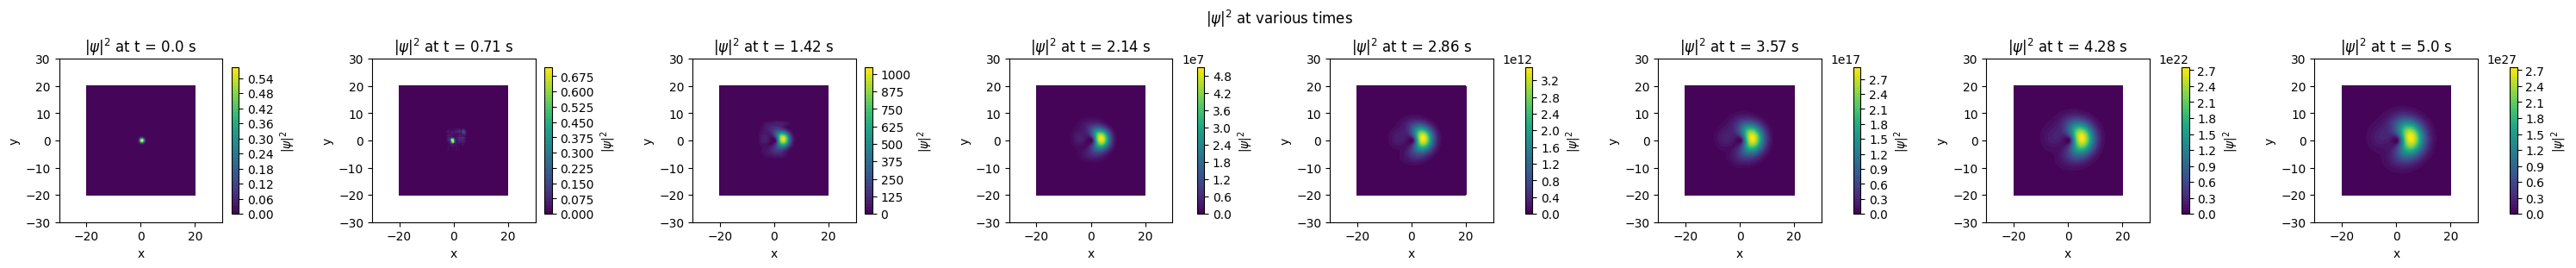

In [184]:
# 4.2 (plot |psi|^2 using contourf)
tsnaps = 8
idts = np.linspace(0, nt-1, tsnaps, dtype=int)

fig, axs = plt.subplots(1, tsnaps, figsize=(30,3), constrained_layout=True) # fig = whole figure, axs = len(idt_to_plot) x 1 array of empty subplots (6 x 5inches)
fig.suptitle('$|\\psi|^2$ at various times') # overall title for figure

X, Y = np.meshgrid(xs, ys, indexing='xy')  

for idt, k in enumerate(idts): # plot at various time indices

    Zk = dens[:,:, k] # X.shape == Y.shape == Z.shape == (ny, nx): 2D slice at t = ts[k] to plot

    # contourf = filled contours (color bands between levels)
    # - 'levels' sets number of contour levels (i.e., choose levels linearly spaced between min and max of Z and plot isolines at those levels))
    # - 'cmap' selects the colormap for coloring between each pair of consecutive levels
    im = axs[idt].contourf(X, Y, Zk, levels=50, cmap='viridis') #
    axs[idt].contour(X, Y, V, levels=[C], colors='red', linewidths=1.5)  # plot potential boundary V = C as red contour line
    axs[idt].set_xlabel('x')
    axs[idt].set_ylabel('y')
    axs[idt].set_title(f'$|\\psi|^2$ at t = {round((ts[k]),2)} s')
    axs[idt].set_box_aspect(1)
    axs[idt].set_xlim([-30,30]) 
    axs[idt].set_ylim([-30,30])
    fig.colorbar(im, ax = axs[idt], fraction = 0.035, pad = 0.04, shrink = 0.9, label=r'$|\psi|^2$')

    # Colorbar shows the |psi|^2 scale

